In [255]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve

In [256]:
df = pd.read_csv('data/train.csv')
df_submit = pd.read_csv('data/test.csv')

In [257]:
cats = ['cat0', 'cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7',
       'cat8', 'cat9', 
        'cat10', 
        'cat11', 'cat12', 'cat13', 'cat14', 'cat15',
       'cat16', 'cat17', 'cat18']

In [258]:
def split_data(df, train_ratio = 0.8):
    mask = np.random.rand(len(df)) < train_ratio
    return df[mask], df[~mask]

In [259]:
df_cats = pd.get_dummies(df[cats])
df_oh = pd.concat([df.drop(cats, axis=1),df_cats], axis= 1)



In [260]:
df_le = df.copy()

In [261]:
for col in cats:
    le = LabelEncoder()
    le.fit(df_le[col])
    df_le[col] = le.transform(df_le[col])


In [262]:
df_train_oh, df_test_oh = split_data(df_oh)
df_train_le, df_test_le = split_data(df_le)

In [263]:
lr_oh = LogisticRegression()
lr_le = LogisticRegression()

In [264]:
lr_oh.fit(df_train_oh.drop(['id', 'target'], axis=1),df_train_oh['target'])
lr_le.fit(df_train_le.drop(['id', 'target'], axis=1),df_train_le['target'])

/Users/mokarakaya/anaconda3/envs/develop/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/mokarakaya/anaconda3/envs/develop/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-lea

LogisticRegression()

In [265]:
pred_oh = lr_oh.predict_proba(df_test_oh.drop(['id', 'target'], axis=1))[:,1]
pred_le = lr_le.predict_proba(df_test_le.drop(['id', 'target'], axis=1))[:,1]

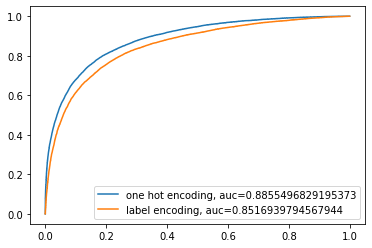

In [266]:
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt

plt.figure(0).clf()
fpr, tpr, thresh = metrics.roc_curve(df_test_oh['target'], pred_oh)
auc = metrics.roc_auc_score(df_test_oh['target'], pred_oh)
plt.plot(fpr,tpr,label="one hot encoding, auc="+str(auc))

fpr, tpr, thresh = metrics.roc_curve(df_test_le['target'], pred_le)
auc = metrics.roc_auc_score(df_test_le['target'], pred_le)
plt.plot(fpr,tpr,label="label encoding, auc="+str(auc))

plt.legend(loc=0)

In [267]:
# df_submit['target'] = lr.predict(df_submit.drop(['id'], axis=1))
# df_submit[['id', 'target']].to_csv("data/submission.csv", index=False)

In [268]:
# sns.heatmap(df_train[['cat0', 'cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7',
#        'cat8', 'cat9', 
#         'cat10', 
#         'cat11', 'cat12', 'cat13', 'cat14', 'cat15',
#        'cat16', 'cat17', 'cat18', 'target']].corr(), vmin=-1, vmax=1, cmap=sns.diverging_palette(20, 220, as_cmap=True))

In [269]:
# df_train[['cat0', 'cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7',
#        'cat8', 'cat9', 
#         'cat10', 
#         'cat11', 'cat12', 'cat13', 'cat14', 'cat15',
#        'cat16', 'cat17', 'cat18', 'target']].corr()